In [80]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [70]:
df =  pd.read_excel('../data/bank_combined.xlsx', sheet_name= 'variables_for_correlation')

In [71]:
df.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'month_number', 'job_admin', 'job_blue_collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes', 'marital_divorced',
       'marital_married', 'marital_single'],
      dtype='object')

In [72]:
columns_to_delete = ['pdays', 'job_unknown', 'education_unknown', 'default_no', 'housing_no', 'loan_no', 'contact_unknown', 'poutcome_unknown', 'y_no', 'marital_divorced']
df.drop(columns=columns_to_delete, inplace=True)

In [73]:
df.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign',
       'previous', 'month_number', 'job_admin', 'job_blue_collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'y_yes', 'marital_married',
       'marital_single'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   education            43354 non-null  float64
 2   balance              45211 non-null  int64  
 3   day                  45211 non-null  int64  
 4   duration             45211 non-null  int64  
 5   campaign             45211 non-null  int64  
 6   previous             45211 non-null  int64  
 7   month_number         45211 non-null  int64  
 8   job_admin            45211 non-null  int64  
 9   job_blue_collar      45211 non-null  int64  
 10  job_entrepreneur     45211 non-null  int64  
 11  job_housemaid        45211 non-null  int64  
 12  job_management       45211 non-null  int64  
 13  job_retired          45211 non-null  int64  
 14  job_self_employed    45211 non-null  int64  
 15  job_services         45211 non-null 

In [75]:
df['education'].describe()

count    43354.000000
mean         2.148775
std          0.665358
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: education, dtype: float64

In [76]:
df['education'] = df['education'].fillna(df['education'].mean())

### PCA

In [77]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [46]:
df_scaled.head()

,age,education,balance,day,duration,campaign,previous,month_number,job_admin,job_blue_collar,...,housing_yes,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,y_yes,marital_married,marital_single
0,-1.406602,-0.228343,-3.081149,-1.058161,0.158575,0.076230,-0.25194,0.355209,-0.359369,-0.523740,...,-1.118674,-0.436803,0.737447,-0.262091,2.867900,-0.205972,-0.185948,-0.363983,-1.229691,-0.628090
1,0.759399,1.306477,-2.696221,0.624050,-0.202555,-0.569351,-0.25194,0.355209,-0.359369,-0.523740,...,0.893915,-0.436803,0.737447,-0.262091,2.867900,-0.205972,-0.185948,2.747384,-1.229691,-0.628090
2,1.795313,1.306477,-1.779885,0.263576,-0.062763,1.044601,-0.25194,-0.475354,-0.359369,-0.523740,...,-1.118674,-0.436803,-1.356030,-0.262091,2.867900,-0.205972,-0.185948,-0.363983,-1.229691,1.592128
3,0.194355,1.306477,-1.554906,1.585313,0.496406,-0.246560,-0.25194,-0.475354,-0.359369,-0.523740,...,0.893915,-0.436803,0.737447,-0.262091,2.867900,-0.205972,-0.185948,2.747384,0.813212,-0.628090
4,1.512791,1.306477,-1.535528,-0.817845,-0.408361,-0.569351,-0.25194,-0.475354,-0.359369,1.909346,...,0.893915,-0.436803,-1.356030,-0.262091,-0.348687,4.855018,-0.185948,-0.363983,0.813212,-0.628090


In [81]:
# file_path = '../data/df_scaled.pkl'
# with open(file_path, 'wb') as f:
#     pickle.dump(df_scaled, f)

In [82]:
file_path = '../data/df_scaled.pkl'
with open(file_path, 'rb') as f:
    df_scaled = pickle.load(f)

                          PC1       PC2       PC3
age                  0.022355  0.004689  0.062742
education            0.007130  0.007074  0.058106
balance              0.063298  0.052507  0.249653
day                  0.004406 -0.004588  0.027371
duration            -0.001839  0.001336 -0.002685
campaign             0.003103  0.005827  0.020826
previous            -0.006568 -0.002273  0.020206
month_number         0.028466  0.001297  0.099366
job_admin           -0.084481  0.215419 -0.059472
job_blue_collar     -0.303670 -0.173758  0.149673
job_entrepreneur     0.015894 -0.063675 -0.074784
job_housemaid       -0.039989 -0.120327  0.134817
job_management       0.439866 -0.202611 -0.190275
job_retired         -0.038610 -0.131230  0.249665
job_self_employed    0.056395 -0.025049 -0.045780
job_services        -0.124747  0.148297 -0.097108
job_student          0.085355  0.171690  0.290414
job_technician      -0.004025  0.216874 -0.133655
job_unemployed      -0.000269  0.014511  0.085869


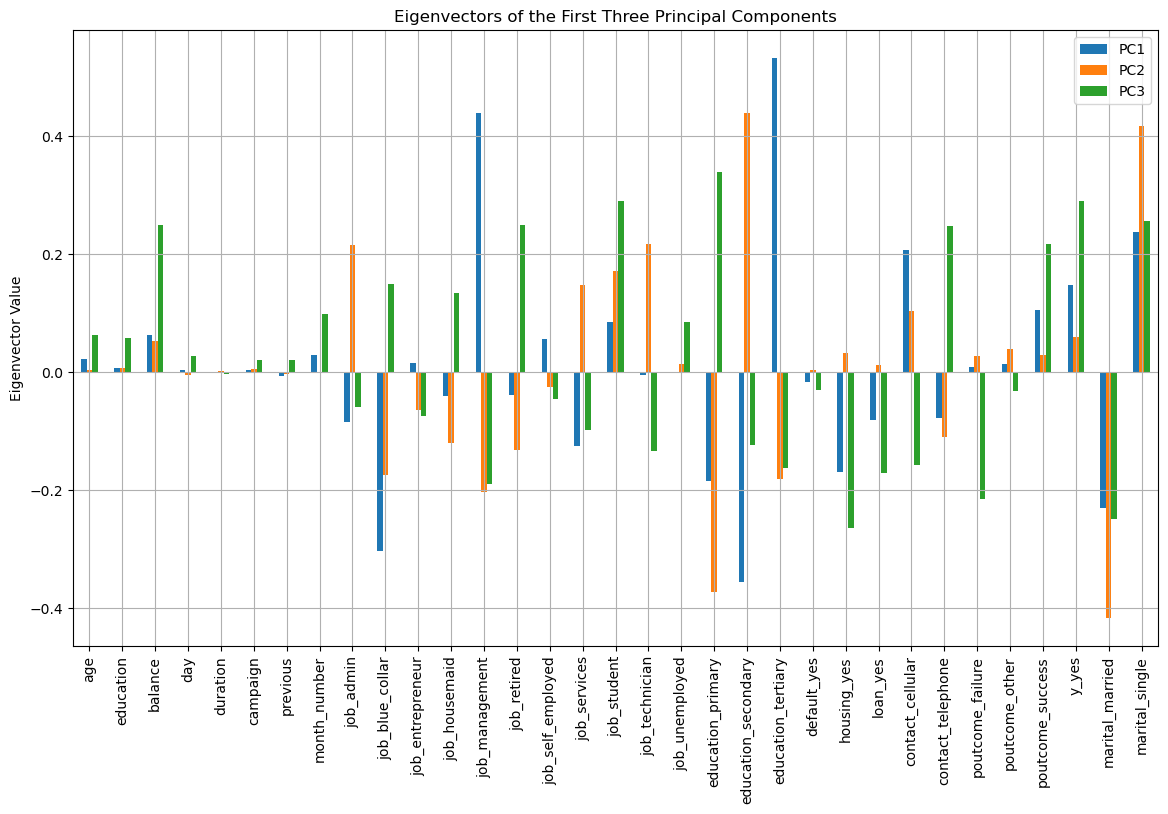

In [83]:
pca = PCA(n_components=3)
pca.fit(df_scaled)

eigenvectors = pca.components_
eigenvectors_df = pd.DataFrame(eigenvectors.T, index=df.columns, columns=['PC1', 'PC2', 'PC3'])

print(eigenvectors_df)

fig, ax = plt.subplots(figsize=(14, 8))
eigenvectors_df.plot(kind='bar', ax=ax)
ax.set_title('Eigenvectors of the First Three Principal Components')
ax.set_ylabel('Eigenvector Value')
plt.xticks(rotation=90)
plt.grid()
plt.show()

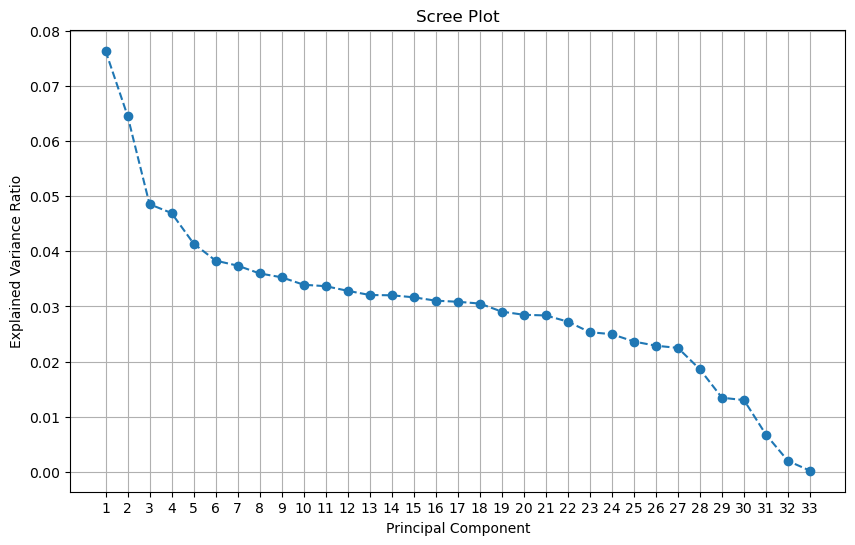

In [84]:
pca = PCA()
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

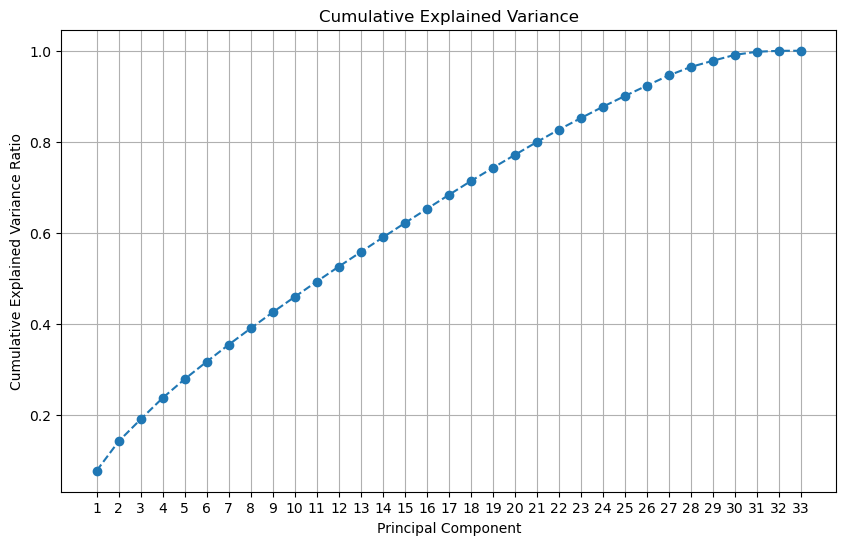

In [85]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

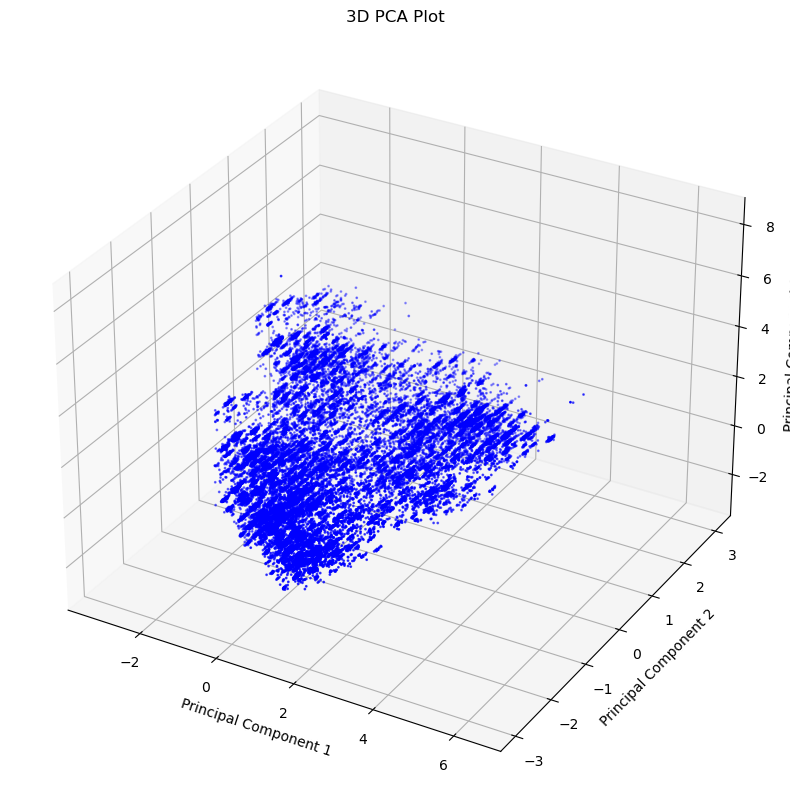

In [95]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
eigenvectors = pca.components_

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='b', marker='o', s=1)

ax.set_title('3D PCA Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### K-Means Clustering

c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

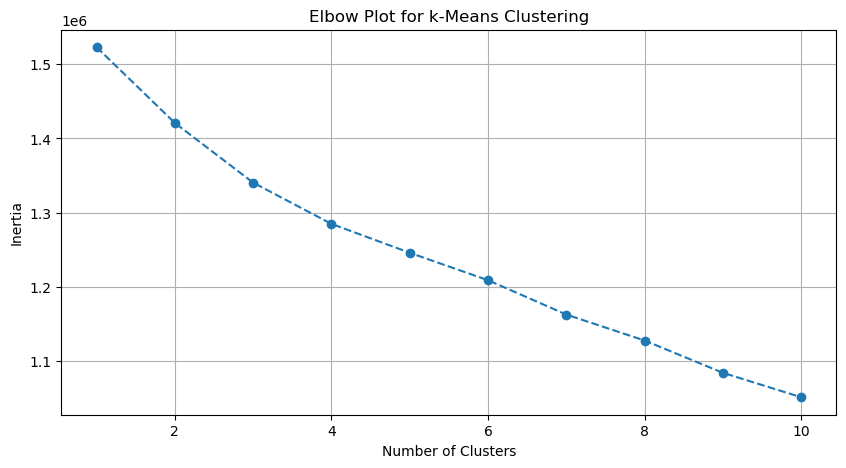

In [96]:
range_n_clusters = range(1, 11)
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for k-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

c:\Users\brigi\anaconda3\envs\env_tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


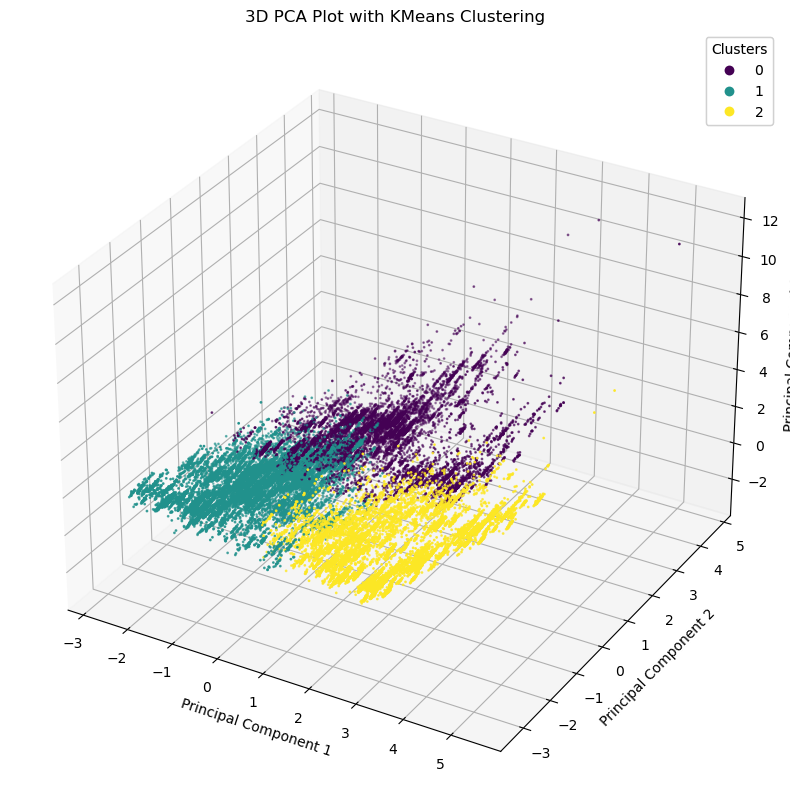

In [97]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

df_scaled['Cluster'] = labels

pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled.drop('Cluster', axis=1))
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', s=1)

ax.set_title('3D PCA Plot with KMeans Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()